In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [148]:
xlsx = pd.ExcelFile('scc_election.xlsx')

In [149]:
table_of_contents = pd.read_excel(xlsx, 0, skiprows=3)

In [377]:
scc_primary = {}
for i, name in enumerate(table_of_contents['Contest']):
    if i == 0:
        scc_primary['{}'.format(str(name))] = pd.read_excel(xlsx, i+1)
    else:
        scc_primary['{}'.format(str(name))] = pd.read_excel(xlsx, i+1, header=[0,1])

In [386]:
mean_find = scc_primary['Registered Voters']
mean_find.drop(scc_primary['Registered Voters'].tail(1).index,inplace=True)
print np.average(mean_find['Registered Voters'])

862.766326531


In [428]:
reg_vote_min = 1000
sig_turnout = scc_primary['Registered Voters'][scc_primary['Registered Voters']['Registered Voters']>reg_vote_min].dropna()
sig_turnout.drop(sig_turnout.tail(1).index,inplace=True)
sig_turnout.set_index('County')

sig_turnout['Voter Turnout'] = [float(str(i).strip('%')) for i in sig_turnout['Voter Turnout']]
print "There are {} precincts with over {} registered voters.".format(len(sig_turnout), reg_vote_min)
sig_turnout.head()

There are 460 precincts with over 1000 registered voters.


,County,Registered Voters,Ballots Cast,Voter Turnout
0,PCT 1001,1338,407,30.42
1,PCT 1003,1132,357,31.54
2,PCT 1006,1130,347,30.71
6,PCT 1011,1152,316,27.43
7,PCT 1013,1029,301,29.25


In [425]:
sig_turnout_gov = sig_turnout.join(scc_primary['GOVERNOR (Vote For 1)'],
                                   on='County', how='left')
sig_turnout_gov['Percent Cox'] = sig_turnout_gov['REP - JOHN H. COX', 'Total Votes'] / sig_turnout_gov['Ballots Cast']

In [426]:
ind_sorted = sig_turnout_gov['Voter Turnout'].sort_values().index
colors_ind_sorted = [sig_turnout_gov['Percent Cox'][i] for i in ind_sorted]

cox_norm = sig_turnout_gov['Percent Cox'] / max(sig_turnout_gov['Percent Cox'])
cox_norm_sorted = colors_ind_sorted / max(sig_turnout_gov['Percent Cox'])

color = cm.coolwarm(cox_norm)
color_sorted = cm.coolwarm(cox_norm_sorted)

print max(sig_turnout_gov['Percent Cox'])
print min(sig_turnout_gov['Percent Cox'])

0.28
0.0208877284595


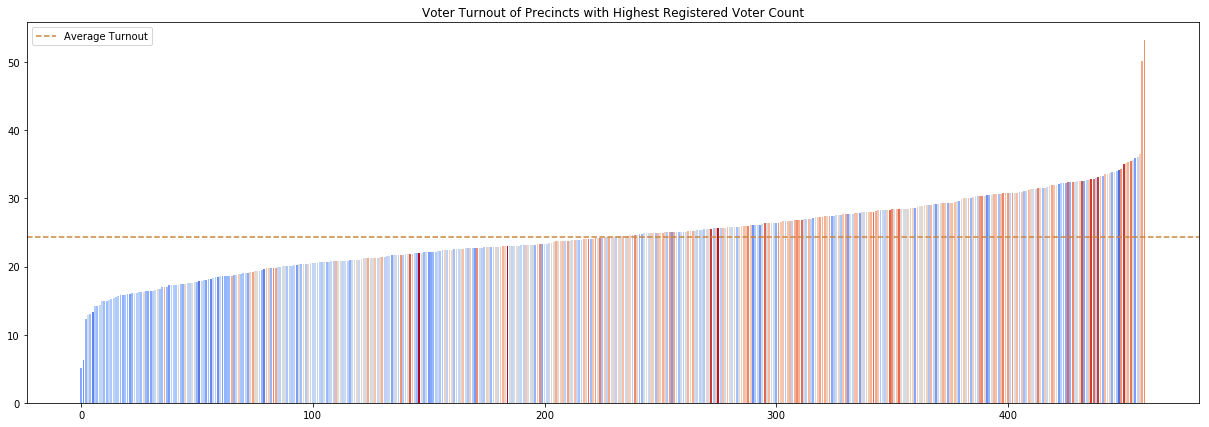

In [429]:
fig, ax = plt.subplots(figsize=(21,7))
plt.bar(range(len(sig_turnout_gov)),
        sig_turnout_gov['Voter Turnout'].sort_values(),
        color=color_sorted)
plt.axhline(24.32, ls='dashed', c='peru', label='Average Turnout')

plt.title('Voter Turnout of Precincts with Highest Registered Voter Count')
# plt.xticks(range(len(sig_turnout)),sig_turnout['County'], rotation=45)
plt.legend()
plt.show()